# Excercise_7

## Open and look

Import `numpy`, `pandas` and `create_engine` from `sqlalchemy`.

Open the `boston_crime_incidents.csv` CSV file.

From the `rms_offense_codes.db` SQLite database, load the `rms_offense_codes` table.

Look at the dataframes (head(), info(), describe(), describe().transpose(), ...).

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [8]:
crime_path = 'data/boston_crime_incidents.csv'
engine = create_engine('sqlite:///data/rms_offense_codes.db')
df_crime = pd.read_csv(crime_path, dtype={'OFFENSE_CODE':str})
df_offense = pd.read_sql('rms_offense_codes', engine)

In [9]:
df_crime.head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,Lat,Long
0,I192082859,00724,N,2019,10,Sunday,9,42.259518,-71.121563
1,I192082751,00724,N,2019,10,Saturday,20,42.262092,-71.116710
2,I192082680,00727,N,2019,10,Saturday,15,42.352375,-71.135096
3,I192082577,00724,N,2019,10,Saturday,4,42.349476,-71.076402
4,I192079582,00727,N,2019,10,Wednesday,8,42.381846,-71.066551


In [10]:
df_offense.head(5)

,CODE,NAME
0,00111,MURDER NON-NEGLIGIENT MANSLAUGHTER
1,00112,KILLING OF FELON BY POLICE
2,00113,KILLING OF FELON BY CITIZEN
3,00114,KILLING OF POLICE BY FELON
4,00121,MANSLAUGHTER - VEHICLE - NEGLIGENCE


## Crimes data

List the days of weeks and the hours with crimes.

Make an histogram on the `HOUR` column.

Make a pie plot on the `DAY_OF_WEEK` column : add percentage, add a title and remove the "y label".

Save the pie plot.

In [11]:
df_crime_offense = pd.merge(
    left=df_crime,
    right=df_offense,
    left_on='OFFENSE_CODE',
    right_on='CODE',
    how='left')

In [12]:
df_crime_offense[['DAY_OF_WEEK', 'HOUR', 'NAME']].head(5)

,DAY_OF_WEEK,HOUR,NAME
0,Sunday,9,AUTO THEFT
1,Saturday,20,AUTO THEFT
2,Saturday,15,AUTO THEFT - LEASED/RENTED VEHICLE
3,Saturday,15,AUTO THEFT LEASE/RENT VEHICLE
4,Saturday,4,AUTO THEFT


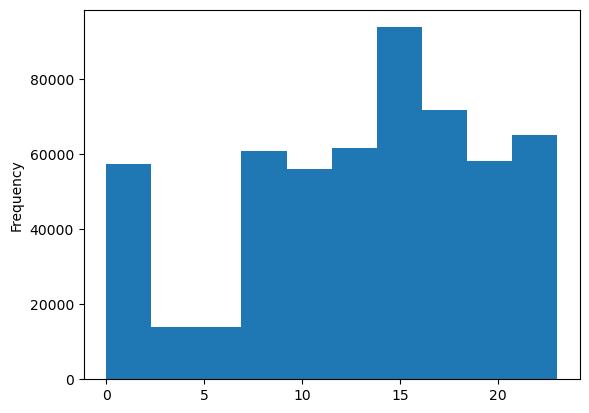

In [13]:
plt.close('all')
df_crime_offense['HOUR'].plot.hist()
plt.show()

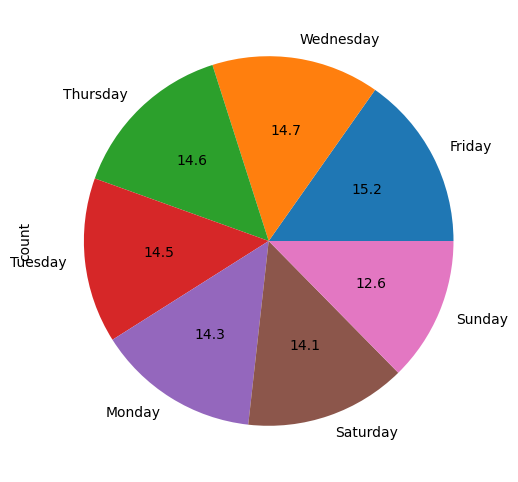

In [14]:
df_crime_offense['DAY_OF_WEEK'].value_counts().plot.pie(
    autopct='%.1f',
    figsize=(6,6)
)
plt.show()

## Crimes name

Look at the two dataframes and find the corresponding column.

Create a new dataframe by merging them. Look at the new dataframe (head(), info(), describe(), describe().transpose(), ...).

Make a pie plot on the `NAME` column (name of the crime). Keep only the first 9 crimes with the most occurrences grouping all others into an `Other` category.

## Geographical analyse

Transform your `crimes` DataFrame into a `geo_crimes` GeoDataFrame (see [this example](https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html) in the documentation for guidance).

Open the `boston_districts.geojson` file as a new GeoDataFrame named `districts`.

Use the `plot` function to view the data in the GeoDataFrame.

Create a new DataFrame by merging `geo_crimes` and `districts` so that each crime is associated with the district where it occurred.

Make a pie plot on the `DISTRICT` column. Keep only the first 9 districts, grouping all others into an `Other` category.

Save the pie plot.

In [15]:
import geopandas as gpd

In [16]:
gdf_crime = gpd.GeoDataFrame(
    df_crime,
    geometry=gpd.points_from_xy(x=df_crime.Long, y=df_crime.Lat),
    crs='EPSG:4326'
)

In [17]:
gdf_district = gpd.read_file('data/boston_districts.geojson')#, engine='pyogrio')

In [18]:
gdf_crime.head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,Lat,Long,geometry
0,I192082859,00724,N,2019,10,Sunday,9,42.259518,-71.121563,POINT (-71.12156 42.25952)
1,I192082751,00724,N,2019,10,Saturday,20,42.262092,-71.116710,POINT (-71.11671 42.26209)
2,I192082680,00727,N,2019,10,Saturday,15,42.352375,-71.135096,POINT (-71.1351 42.35237)
3,I192082577,00724,N,2019,10,Saturday,4,42.349476,-71.076402,POINT (-71.0764 42.34948)
4,I192079582,00727,N,2019,10,Wednesday,8,42.381846,-71.066551,POINT (-71.06655 42.38185)


In [19]:
gdf_district.head(5)

,DISTRICT,geometry
0,Charlestown Neighborhood,"POLYGON ((-71.07309 42.38626, -71.07387 42.386..."
1,Leather District,"POLYGON ((-71.05715 42.35214, -71.05726 42.352..."
2,Harborpark: North End Waterfront,"POLYGON ((-71.04861 42.37083, -71.04937 42.370..."
3,Cambridge Street North,"POLYGON ((-71.06983 42.36242, -71.06999 42.362..."
4,Harborpark: Charlestown Waterfront,"POLYGON ((-71.07394 42.38457, -71.07343 42.384..."


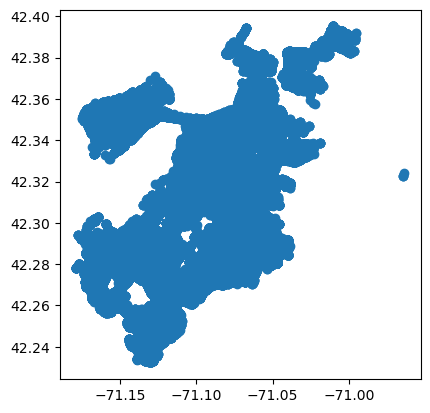

In [20]:
gdf_crime.plot()
plt.show()

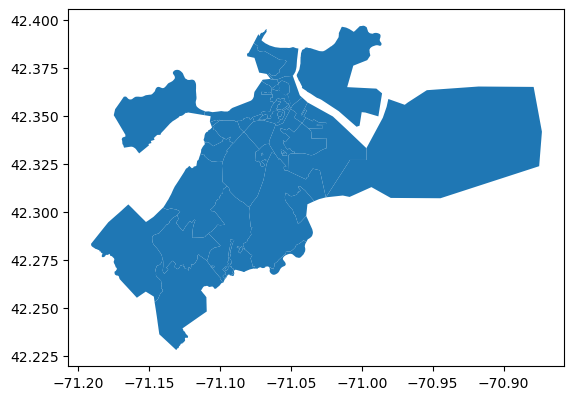

In [29]:
gdf_district.plot()
plt.show()

In [25]:
print(gdf_crime.sindex.valid_query_predicates)
print(gdf_district.sindex.valid_query_predicates)

{None, 'intersects', 'crosses', 'within', 'covers', 'contains', 'overlaps', 'dwithin', 'covered_by', 'contains_properly', 'touches'}
{None, 'intersects', 'crosses', 'within', 'covers', 'contains', 'overlaps', 'dwithin', 'covered_by', 'contains_properly', 'touches'}


In [26]:
gdf_crime_district = gpd.sjoin(
    gdf_crime,  
    gdf_district,  
    how='left',  
    predicate='intersects',
)

In [28]:
gdf_crime_district.head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,Lat,Long,geometry,index_right,DISTRICT
0,I192082859,00724,N,2019,10,Sunday,9,42.259518,-71.121563,POINT (-71.12156 42.25952),20.0,Hyde Park Neighborhood
1,I192082751,00724,N,2019,10,Saturday,20,42.262092,-71.116710,POINT (-71.11671 42.26209),20.0,Hyde Park Neighborhood
2,I192082680,00727,N,2019,10,Saturday,15,42.352375,-71.135096,POINT (-71.1351 42.35237),18.0,Allston/Brighton Neighborhood
3,I192082577,00724,N,2019,10,Saturday,4,42.349476,-71.076402,POINT (-71.0764 42.34948),32.0,Boston Proper
4,I192079582,00727,N,2019,10,Wednesday,8,42.381846,-71.066551,POINT (-71.06655 42.38185),0.0,Charlestown Neighborhood


In [44]:
s1 = gdf_crime_district['DISTRICT'].value_counts().iloc[:9]
s2 = pd.Series([gdf_crime_district['DISTRICT'].value_counts().iloc[9:].sum()], ['Other'])

In [46]:
s = pd.concat([s1, s2])
s

Dorchester Neighborhood           72821
Roxbury Neighborhood              57163
Greater Mattapan Neighborhood     29266
Allston/Brighton Neighborhood     25535
Boston Proper                     20158
Jamaica Plain Neighborhood        19994
South End Neighborhood            17228
Hyde Park Neighborhood            17211
East Boston Neighborhood          16860
Other                            123158
dtype: int64

<Axes: >

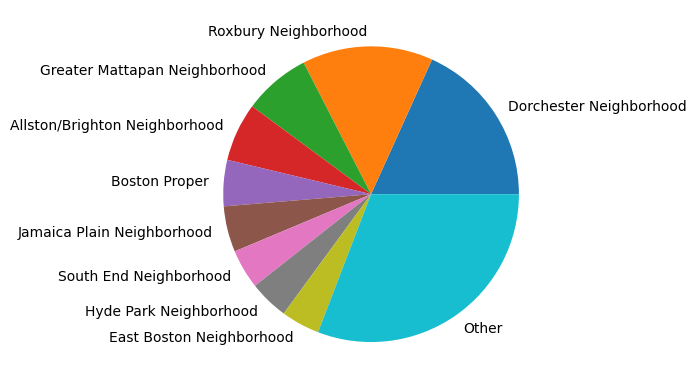

In [48]:
s.plot.pie()